# Flight Ticket Fare Prediction

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the excel files

data= pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Flight Ticket Fare/Data_Train.xlsx")

In [3]:
# check the first five sample data 

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#check the info of the data dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [5]:
# checking the null values

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Treatment of the Missing Values

# Since only two records are having the null values, so we can drop these records

data.dropna(inplace=True) 

### Feature Preprocessing and Feature Engineering

In [7]:
# Lets split the feature Date of Journey into Date,Month and Year 

a=data.Date_of_Journey.str.split('/')
data['Date'] = a.str[0].astype(int)
data['Month']= a.str[1].astype(int)
data['Year'] = a.str[2].astype(int)

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [9]:
# Lets split the feature Dep_Time into Dep_Hours Dep_Mins 

a=data.Dep_Time.str.split(':')
data['Dep_Hours'] = a.str[0].astype(int)
data['Dep_Mins']= a.str[1].astype(int)

In [10]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [11]:
# Lets split the feature Arrival_Time into Arrival_Hours Arrival_Mins 

a=data.Arrival_Time.str.split(':')
data['Arrival_Hours'] = a.str[0].astype(int)

# Since some Arrival_Time contains the date also, so we will drop those dates so that no date will be 
# consideered in our new feature Arrivale_Mins

data['Arrival_Mins']= a.str[1].str.split(' ').str[0].astype(int)

In [12]:
data['Arrival_Hours'].isnull().sum()

0

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [14]:
# Lets split the feature Duration into Duration_Hours Duration_Mins 

a=data.Duration.str.split(' ')
data['Duration_Hours'] = a.str[0]
data['Duration_Hours'] = data['Duration_Hours'].replace("h","",regex=True)

data['Duration_Mins']  = a.str[1].replace("m","",regex=True)
data['Duration_Mins']  = data['Duration_Mins'].fillna(0)

In [15]:
# There is a record in Duration_Hours with 5m value, since it is not possible to have flight duration of only 5 minutes, we will
# drop this record

data = data[data['Duration_Hours']!='5m']

In [16]:
# Lets convert the data type from object to int for Duration_Hours Duration_Mins 

data['Duration_Hours']= data['Duration_Hours'].astype(int)
data['Duration_Mins']= data['Duration_Mins'].astype(int)

In [17]:
data['Duration_Hours'].unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39, 41, 40], dtype=int64)

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [19]:
# Lets convert the feature Total_stops to numerical values

data['Tot_Stops']= data['Total_Stops'].str.split(' ').str[0]
data['Tot_Stops']= data['Tot_Stops'].replace("non-stop",0).astype(int)

In [20]:
# Lets create a new feature Weekend whose value will be Y if its a weekend else N

import datetime as dt

data['Date_of_Journey_time']=pd.to_datetime(data['Date_of_Journey'],dayfirst=True)

a=[]
c=[]
a=data['Date_of_Journey_time'].dt.weekday

for value in a:
    if value > 4:
        b='Y'
    else:
        b='N'
    c.append(b)
    
data['Weekend']=c

In [21]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_Hours',
       'Dep_Mins', 'Arrival_Hours', 'Arrival_Mins', 'Duration_Hours',
       'Duration_Mins', 'Tot_Stops', 'Date_of_Journey_time', 'Weekend'],
      dtype='object')

In [22]:
# Lets drop the unnecessary columns

data.drop(labels=['Date_of_Journey','Route','Dep_Time', 'Arrival_Time', 'Duration', 
                  'Total_Stops','Additional_Info','Date_of_Journey_time','Year']
          ,inplace=True,axis=1)

### EDA

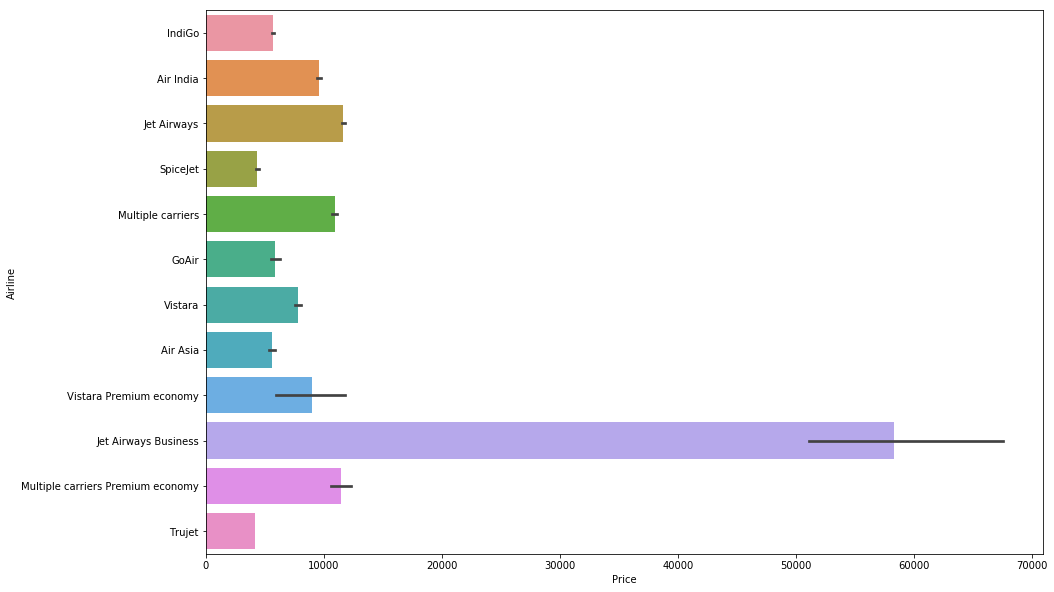

In [23]:
# Bivariate Analysis

plt.figure(figsize=(15,10))
sns.barplot(data=data,y='Airline',x='Price')

##### We can observe that the fare of the flight 'Jet Airways Business' is pretty high as compared to other flights

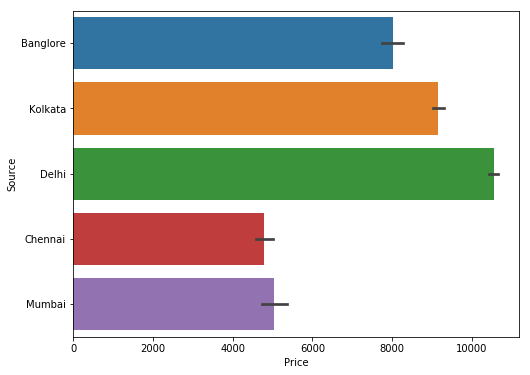

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,y='Source',x='Price')

##### We can observe that the fare of the flight departing from 'Delhi' and 'Kolkata' are pretty high as compared to other source destinations.

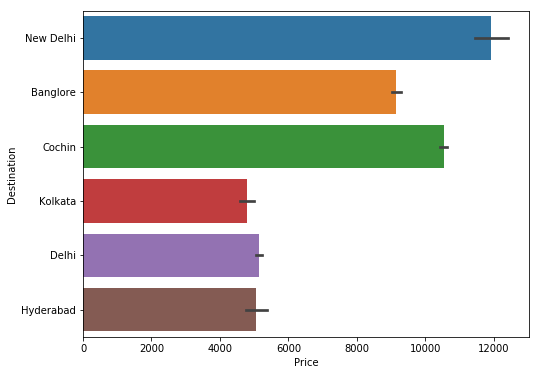

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,y='Destination',x='Price')

##### We can observe that the fare of the flight arriving at 'Delhi' and 'Cochin' are pretty high as compared to other arriving destinations.

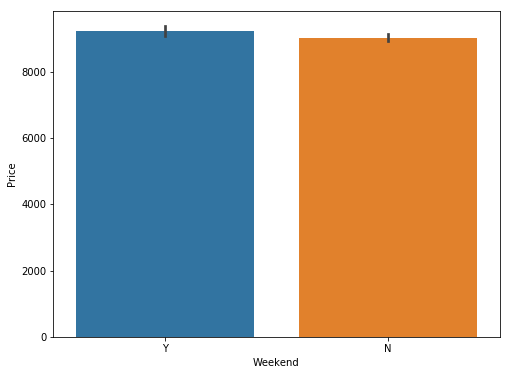

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x='Weekend',y='Price')

##### We can observe that the fare of the flight is not getting impacted by the fact whether the traveling date is weekend or not.

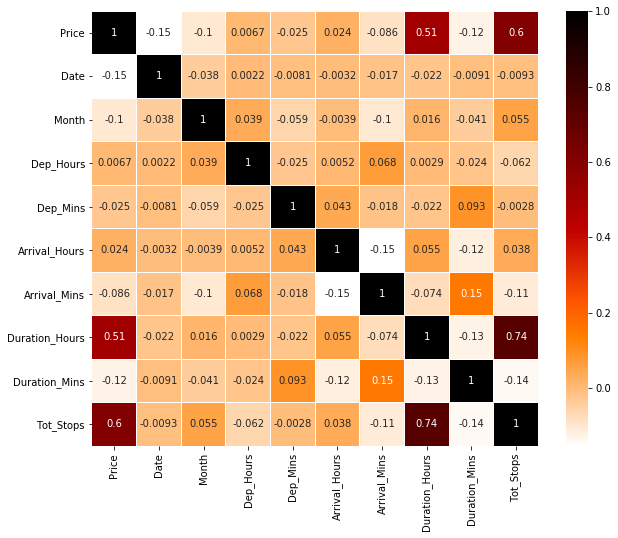

In [27]:
# Lets map the heat map to get the correlation between the target variables and features 

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='gist_heat_r',linewidths=0.1,annot=True)

##### We can clearly see the Duration_Hours feature has a very postive correlation with the ticket Pricing of the flight.

In [28]:
# Lets convert the categorical to numerical features using pd.get_dummies

data_num = data.drop(labels=['Airline', 'Source', 'Destination','Weekend'],axis=1)
data_cat = data[['Airline', 'Source', 'Destination','Weekend']].copy()

data_cat = pd.get_dummies(data_cat)
data_cat.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekend_N,Weekend_Y
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [29]:
# Lets concat both the cat and numerical features

data_final = pd.concat([data_num,data_cat], axis= 1)
data_final.shape

(10681, 35)

In [30]:
# Lets segregate the target and features

X = data_final.drop(labels='Price',axis=1)
y = data_final['Price']

y.shape

(10681,)

In [31]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Price', 'Date', 'Month',
       'Dep_Hours', 'Dep_Mins', 'Arrival_Hours', 'Arrival_Mins',
       'Duration_Hours', 'Duration_Mins', 'Tot_Stops', 'Weekend'],
      dtype='object')

In [32]:
# Scaling the features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)
X.head()

,Date,Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins,Tot_Stops,Airline_Air Asia,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekend_N,Weekend_Y
0,1.237192,-1.467619,1.654162,-0.234832,-1.800328,-0.889941,-0.970748,1.278965,-1.220619,-0.175458,...,-0.606305,-0.264016,-0.606305,-0.859163,-0.366532,-0.264016,-0.192329,3.234239,-1.548310,1.548310
1,-1.475375,0.250165,-1.303018,1.363790,-0.050871,-0.586988,-0.382120,-0.196456,1.741761,-0.175458,...,1.649335,-0.264016,1.649335,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192,0.645865,-0.645865
2,-0.531874,1.109057,-0.607211,0.031605,-1.362964,0.018919,1.030586,-1.671877,1.741761,-0.175458,...,-0.606305,-0.264016,-0.606305,1.163923,-0.366532,-0.264016,-0.192329,-0.309192,-1.548310,1.548310
3,-0.178060,0.250165,0.958355,-1.034142,1.407010,0.321872,-0.617571,-0.196456,0.260571,-0.175458,...,1.649335,-0.264016,1.649335,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192,-1.548310,1.548310
4,-1.475375,-1.467619,0.610452,1.363790,1.115434,0.624825,-0.735297,0.983881,0.260571,-0.175458,...,-0.606305,-0.264016,-0.606305,-0.859163,-0.366532,-0.264016,-0.192329,3.234239,0.645865,-0.645865


In [33]:
# Since Airline Trujet is not in the test dataset we will drop this feature

X= X.drop(labels='Airline_Trujet',axis=1)
X.shape

(10681, 33)

In [34]:
# Segregate the data set into train and test set

from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

## Linear Regression

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# Lets calculate the score on the train set

lr_predicted_train = lr.predict(train_X)
lr_score_train = mean_squared_error(train_y,lr_predicted_train)

print ('Linear Model on the train set :')
print ('Mean Squared Error: %.2f' %(lr_score_train))
print ('Root Mean Squared Error: %.2f' %((np.sqrt(lr_score_train))))

Linear Model on the train set :
Mean Squared Error: 8221088.84
Root Mean Squared Error: 2867.24


In [37]:
# Lets calculate the score on the train set

lr_predicted_test = lr.predict(test_X)
lr_score_test = mean_squared_error(test_y,lr_predicted_test)

print ('Linear Model on the train set :')
print ('Mean Squared Error: %.2f' %(lr_score_test))
print ('Root Mean Squared Error: %.2f' %((np.sqrt(lr_score_test))))

Linear Model on the train set :
Mean Squared Error: 7508332.17
Root Mean Squared Error: 2740.13


## Implementing the XG Boosting 

In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth=7,learning_rate=0.099,n_estimators=200,objective='reg:linear',colsample_bytree=0.7,
                           reg_alpha=10,subsample=1,random_state=42)

In [40]:
xgb_reg.fit(train_X,train_y)

[00:15:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.099, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=10, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [41]:
xgb_predicted = xgb_reg.predict(test_X)
xgb_score = mean_squared_error(test_y,xgb_predicted)

print ('XG Boosting Regression Model :')
print ('Mean Squared Error: %.2f' %(xgb_score))
print ('Root Mean Squared Error: %.2f' %((np.sqrt(xgb_score))))

XG Boosting Regression Model :
Mean Squared Error: 2579881.23
Root Mean Squared Error: 1606.20


## XG Boost Algorithm to predict the price of flight ticket for test set

In [42]:
# read the test excel files

data_test= pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Flight Ticket Fare/Test_set.xlsx")

In [43]:
# checking the null values

data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [44]:
# Lets split the feature Date of Journey into Date,Month and Year 

a=data_test.Date_of_Journey.str.split('/')
data_test['Date'] = a.str[0].astype(int)
data_test['Month']= a.str[1].astype(int)
data_test['Year'] = a.str[2].astype(int)

# Lets split the feature Dep_Time into Dep_Hours Dep_Mins 

a=data_test.Dep_Time.str.split(':')
data_test['Dep_Hours'] = a.str[0].astype(int)
data_test['Dep_Mins']= a.str[1].astype(int)

# Lets split the feature Arrival_Time into Arrival_Hours Arrival_Mins 

a=data_test.Arrival_Time.str.split(':')
data_test['Arrival_Hours'] = a.str[0].astype(int)

# Since some Arrival_Time contains the date also, so we will drop those dates so that no date will be 
# consideered in our new feature Arrivale_Mins

data_test['Arrival_Mins']= a.str[1].str.split(' ').str[0].astype(int)

# Lets split the feature Duration into Duration_Hours Duration_Mins 

a=data_test.Duration.str.split(' ')
data_test['Duration_Hours'] = a.str[0]
data_test['Duration_Hours'] = data_test['Duration_Hours'].replace("h","",regex=True)

data_test['Duration_Mins']  = a.str[1].replace("m","",regex=True)
data_test['Duration_Mins']  = data_test['Duration_Mins'].fillna(0)

# There is a record in Duration_Hours with 5m value, since it is not possible to have flight duration of only 5 minutes, we will
# drop this record

data_test = data_test[data_test['Duration_Hours']!='5m']

# Lets convert the data_test type from object to int for Duration_Hours Duration_Mins 

data_test['Duration_Hours']= data_test['Duration_Hours'].astype(int)
data_test['Duration_Mins']= data_test['Duration_Mins'].astype(int)

# Lets convert the feature Total_stops to numerical values

data_test['Tot_Stops']= data_test['Total_Stops'].str.split(' ').str[0]
data_test['Tot_Stops']= data_test['Tot_Stops'].replace("non-stop",0).astype(int)

# Lets create a new feature Weekend whose value will be Y if its a weekend else N

import datetime as dt

data_test['Date_of_Journey_time']=pd.to_datetime(data_test['Date_of_Journey'],dayfirst=True)

a=[]
c=[]
a=data_test['Date_of_Journey_time'].dt.weekday

for value in a:
    if value > 4:
        b='Y'
    else:
        b='N'
    c.append(b)
    
data_test['Weekend']=c

# Lets drop the unnecessary columns

data_test.drop(labels=['Date_of_Journey','Route','Dep_Time', 'Arrival_Time', 'Duration', 
                  'Total_Stops','Additional_Info','Date_of_Journey_time','Year']
          ,inplace=True,axis=1)

# Lets convert the categorical to numerical features using pd.get_dummies

data_test_num = data_test.drop(labels=['Airline', 'Source', 'Destination','Weekend'],axis=1)
data_test_cat = data_test[['Airline', 'Source', 'Destination','Weekend']].copy()

data_test_cat = pd.get_dummies(data_test_cat)

# Lets concat both the cat and numerical features

data_test_final = pd.concat([data_test_num,data_test_cat], axis= 1)
data_test_final.shape

# Lets segregate the target and features

X = data_test_final

# Scaling the features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)


In [45]:
X.head()

,Date,Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins,Tot_Stops,Airline_Air Asia,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekend_N,Weekend_Y
0,-0.837219,1.094432,0.773395,0.268233,-1.361355,0.027031,-0.022994,1.588483,0.248597,-0.182433,...,-0.601868,-0.272849,-0.601868,1.154070,-0.367044,-0.272849,-0.170005,-0.312829,0.655238,-0.655238
1,-0.110898,0.240007,-1.161081,-0.255867,-0.509112,-0.271208,-0.738271,-1.696761,0.248597,-0.182433,...,1.661494,-0.272849,1.661494,-0.866499,-0.367044,-0.272849,-0.170005,-0.312829,-1.526164,1.526164
2,0.978584,0.240007,1.125118,-0.517917,0.769254,-1.464163,1.526771,0.991166,0.248597,-0.182433,...,-0.601868,-0.272849,-0.601868,1.154070,-0.367044,-0.272849,-0.170005,-0.312829,0.655238,-0.655238
3,0.978584,0.240007,-0.809358,-1.304066,1.053335,-1.464163,0.334644,-1.696761,0.248597,-0.182433,...,-0.601868,-0.272849,-0.601868,1.154070,-0.367044,-0.272849,-0.170005,-0.312829,0.655238,-0.655238
4,1.341745,1.094432,1.828564,1.578483,-1.645436,1.219987,-0.976696,1.289825,-1.239640,5.481470,...,-0.601868,-0.272849,-0.601868,-0.866499,2.724466,-0.272849,-0.170005,-0.312829,0.655238,-0.655238


In [46]:
# Predicting the fees for the data_test using XGB Regressor

xgb_predicted_test = xgb_reg.predict(X)
xgb_predicted_test

array([11648.244 ,  4220.9395, 14271.397 , ..., 15728.744 , 12362.177 ,
        8028.9014], dtype=float32)

In [47]:
data_test['Price']=pd.DataFrame(xgb_predicted_test)

In [48]:
data_test.to_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16/myFlightPricePrediction.xlsx")